In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-n-cats/dog3.jpg
/kaggle/input/dogs-n-cats/dog2.jpg
/kaggle/input/dogs-n-cats/cat1.jpg
/kaggle/input/dogs-n-cats/cat2.jpg
/kaggle/input/dogs-n-cats/dog5.jpg
/kaggle/input/dogs-n-cats/cat5.jpg
/kaggle/input/dogs-n-cats/dog4.jpg
/kaggle/input/dogs-n-cats/cat4.jpg
/kaggle/input/dogs-n-cats/cat3.jpg
/kaggle/input/dogs-n-cats/dog1.jpg


In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-10-23 17:31:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 173.194.217.207, 173.194.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   158MB/s    in 0.4s    

2023-10-23 17:31:56 (158 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import zipfile
local_zip = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os
base_dir = "/kaggle/working/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, "train")
train_dir_dogs = os.path.join(train_dir, "dogs")
train_dir_cats = os.path.join(train_dir,"cats")
validation_dir = os.path.join(base_dir, "validation")
validation_dir_dogs = os.path.join(validation_dir, "dogs")
validation_dir_cats = os.path.join(validation_dir, "cats")

In [5]:
dogs = [os.path.join(train_dir_dogs,i) for i in os.listdir(train_dir_dogs)[:10]]
cats = [os.path.join(train_dir_cats,i) for i in os.listdir(train_dir_cats)[:10]]

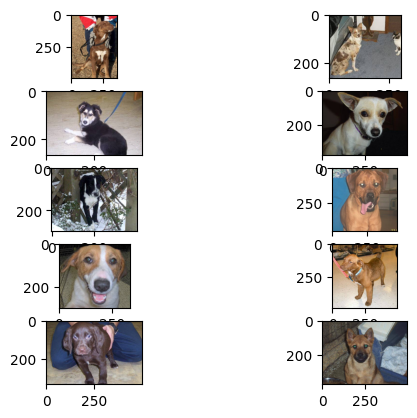

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
i = 1
for image in dogs:
    sp = plt.subplot(5,2,i)
    i+=1
    plt.imshow(mpimg.imread(image))

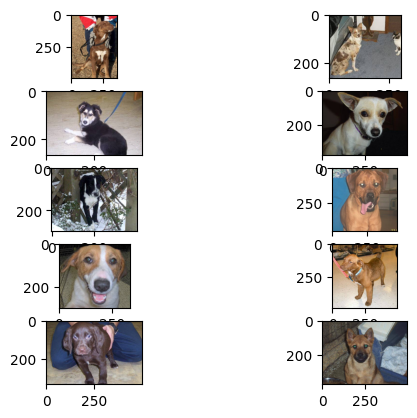

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
i = 1
for image in dogs:
    sp = plt.subplot(5,2,i)
    i+=1
    plt.imshow(mpimg.imread(image))

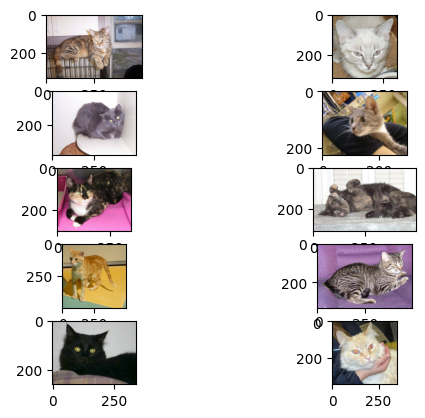

In [8]:
i = 1
for image in cats:
    plt.subplot(5,2,i)
    i+=1
    plt.imshow(mpimg.imread(image))

In [9]:
import tensorflow as tf
import tensorflow.keras as keras

model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3), activation =tf.nn.relu, input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32, (3,3), activation= "relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [10]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode="binary",
                                                   target_size=(150,150))
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                 batch_size=20,
                                                 class_mode="binary",
                                                 target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
100/100 [==============================] - 35s 335ms/step - loss: 0.7095 - accuracy: 0.5160 - val_loss: 0.6679 - val_accuracy: 0.6300
Epoch 2/15
100/100 [==============================] - 33s 329ms/step - loss: 0.6454 - accuracy: 0.6445 - val_loss: 0.6235 - val_accuracy: 0.6980
Epoch 3/15
100/100 [==============================] - 33s 330ms/step - loss: 0.5754 - accuracy: 0.7040 - val_loss: 0.6867 - val_accuracy: 0.5820
Epoch 4/15
100/100 [==============================] - 34s 338ms/step - loss: 0.5309 - accuracy: 0.7240 - val_loss: 0.5302 - val_accuracy: 0.7290
Epoch 5/15
100/100 [==============================] - 34s 338ms/step - loss: 0.4810 - accuracy: 0.7695 - val_loss: 0.5475 - val_accuracy: 0.7190
Epoch 6/15
100/100 [==============================] - 35s 345ms/step - loss: 0.4260 - accuracy: 0.8115 - val_loss: 0.6080 - val_accuracy: 0.6910
Epoch 7/15
100/100 [==============================] - 34s 338ms/step - loss: 0.3698 - accuracy: 0.8335 - val_loss: 0.6314 - val_ac

In [13]:
from tensorflow.keras.utils import load_img, img_to_array
test_images = ["/kaggle/input/dogs-n-cats/"+i for i in os.listdir("/kaggle/input/dogs-n-cats")]
for file_name in test_images:
    img = load_img(file_name, target_size=(150,150))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10, verbose=3)
    if classes[0] > 0.5:
        print(file_name," is a dog ", classes[0])
    else:
        print(file_name," is a cat ", classes[0])

/kaggle/input/dogs-n-cats/dog3.jpg  is a dog  [1.]
/kaggle/input/dogs-n-cats/dog2.jpg  is a dog  [0.99999887]
/kaggle/input/dogs-n-cats/cat1.jpg  is a cat  [0.02257505]
/kaggle/input/dogs-n-cats/cat2.jpg  is a cat  [0.1267141]
/kaggle/input/dogs-n-cats/dog5.jpg  is a dog  [0.9999993]
/kaggle/input/dogs-n-cats/cat5.jpg  is a cat  [0.01467041]
/kaggle/input/dogs-n-cats/dog4.jpg  is a dog  [0.9999886]
/kaggle/input/dogs-n-cats/cat4.jpg  is a cat  [0.10136346]
/kaggle/input/dogs-n-cats/cat3.jpg  is a cat  [0.03827416]
/kaggle/input/dogs-n-cats/dog1.jpg  is a dog  [0.9990781]


Text(0.5, 1.0, 'Training and validation loss')

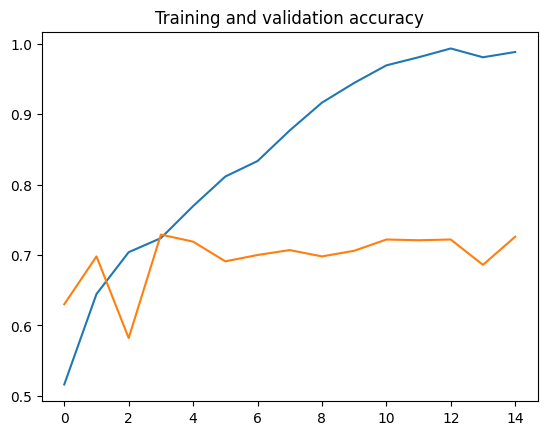

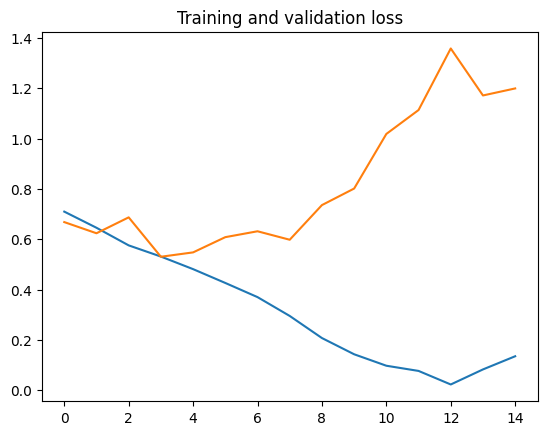

In [14]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )